<a href="https://colab.research.google.com/github/Ashwin-2408/Ashwin-2408/blob/main/Computer_Vision_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convolution Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can identify patterns in visual data.

## Get Data

The images we are using are from the kaggle 101 food dataset. Link : https://www.kaggle.com/datasets/dansbecker/food-101

However we have modified the dataset and choose to work with only steak and pizza.

In [1]:
import zipfile
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the zip file
zipref=zipfile.ZipFile("pizza_steak.zip")
zipref.extractall()
zipref.close()

--2025-06-15 13:46:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 173.194.215.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  95.3MB/s    in 1.1s    

2025-06-15 13:46:50 (95.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [5]:
import os

for dirpath,dirnames,filenames in  os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_image(target_directory,target_class):
  target = target_directory+target_class
  random_image=random.sample(os.listdir(target),1)
  img=mpimg.imread(target + '/' + random_image[0])
  print("Image shape is: " + f"{img.shape}")
  print("Image file name is"+ f"{random_image}")
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)





Image shape is: (384, 512, 3)
Image file name is['256592.jpg']


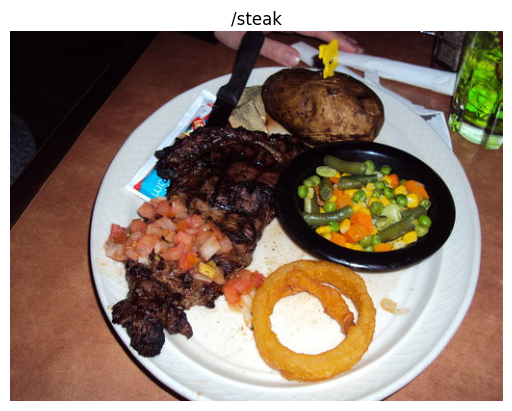

In [8]:
view_image("pizza_steak/train","/steak")

Image shape is: (512, 512, 3)
Image file name is['2602611.jpg']


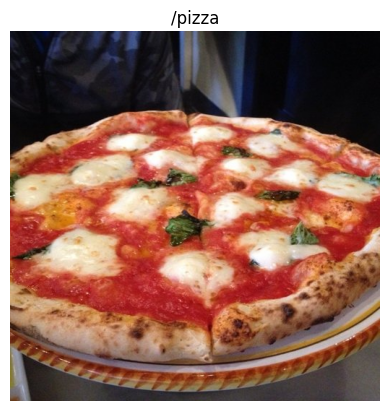

In [9]:
img=view_image("pizza_steak/train","/pizza")

## Lets build a Convoluational Neural Network
* Load the images
* Preprocess the images
* Create the CNN model
* Compile the CNN model
* Fit the CNN model

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
import random
import numpy as np

tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

train_data_gen=ImageDataGenerator(rescale=1/255.)
valid_data_gen=ImageDataGenerator(rescale=1/255.)


train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#importing data from directories and converting them into batches
train_data=train_data_gen.flow_from_directory(train_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)
valid_data=valid_data_gen.flow_from_directory(test_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)

#Creating a CNN model

Model_V1=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation="sigmoid")
                              ])

#Compiling our CNN Model

Model_V1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

#Fitting our model with train data

history_1=Model_V1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=(valid_data),validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 215ms/step - accuracy: 0.5388 - loss: 0.6925 - val_accuracy: 0.8180 - val_loss: 0.4386
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.7749 - loss: 0.4574 - val_accuracy: 0.8340 - val_loss: 0.3865
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.8021 - loss: 0.4315 - val_accuracy: 0.8500 - val_loss: 0.3416
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.8132 - loss: 0.3923 - val_accuracy: 0.8720 - val_loss: 0.3422
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.8492 - loss: 0.3630 - val_accuracy: 0.7740 - val_loss: 0.4680


##Using a GPU to speed up the training process

In [9]:
#Epoch 1/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.5388 - loss: 0.6925 - val_accuracy: 0.8200 - val_loss: 0.4385
import random
import numpy as np

tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

train_data_gen=ImageDataGenerator(rescale=1/255.)
valid_data_gen=ImageDataGenerator(rescale=1/255.)


train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#importing data from directories and converting them into batches
train_data=train_data_gen.flow_from_directory(train_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)
valid_data=valid_data_gen.flow_from_directory(test_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)

#Creating a CNN model

Model_V2=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation="sigmoid")
                              ])

#Compiling our CNN Model

Model_V2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

#Fitting our model with train data

history_2=Model_V2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=(valid_data),validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.5388 - loss: 0.6925 - val_accuracy: 0.8160 - val_loss: 0.4388
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.7751 - loss: 0.4575 - val_accuracy: 0.8320 - val_loss: 0.3864
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.8015 - loss: 0.4315 - val_accuracy: 0.8500 - val_loss: 0.3414
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8130 - loss: 0.3918 - val_accuracy: 0.8580 - val_loss: 0.3421
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.8471 - loss: 0.3597 - val_accuracy: 0.7720 - val_loss: 0.4771


The model trained using the GPU took 1/5 th of the time

In [10]:
Model_V2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Creating a normal classification Model for Comparison

In [11]:
Model_V3=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
                              ])
Model_V3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_3=Model_V3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.4948 - loss: 3.9940 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.4909 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.5096 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.5152 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932


WE can see that the normal classification model does not perform well compared to the CNN

In [12]:
Model_V3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having more than 20x more trainable parameters compared to our CNN it performs worst.

In [13]:
Model_V4=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
                              ])
Model_V4.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_4=Model_V4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - accuracy: 0.5721 - loss: 8.0191 - val_accuracy: 0.5780 - val_loss: 2.1455
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.7164 - loss: 0.9390 - val_accuracy: 0.7760 - val_loss: 0.5633
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.7116 - loss: 1.2693 - val_accuracy: 0.7620 - val_loss: 0.5976
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.7428 - loss: 0.6719 - val_accuracy: 0.7720 - val_loss: 0.4445
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7359 - loss: 0.5533 - val_accuracy: 0.7580 - val_loss: 0.4991


In [14]:
Model_V4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Breaking Down Binary Classification

### Visualizing the Data


Image shape is: (512, 512, 3)
Image file name is['1823263.jpg']
Image shape is: (512, 512, 3)
Image file name is['3057192.jpg']


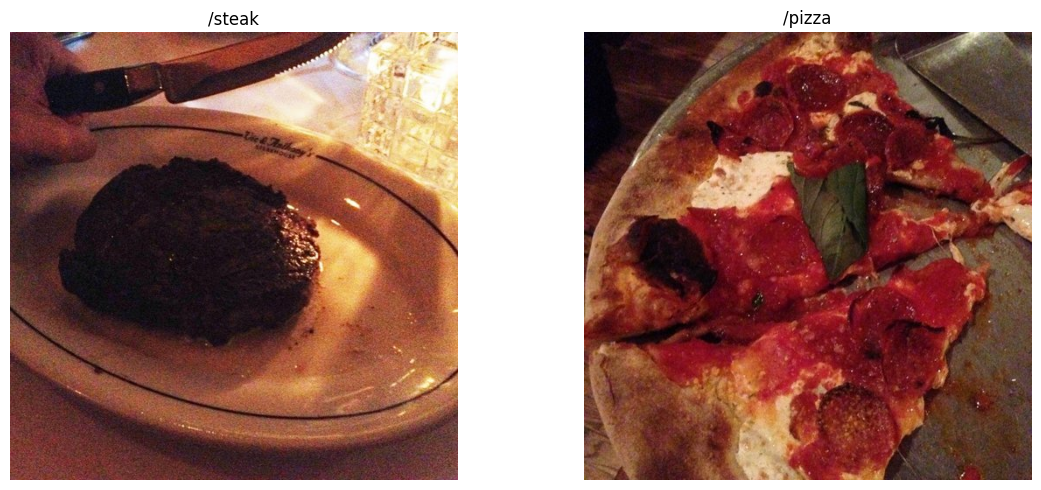

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
view_image("pizza_steak/train", "/steak")

plt.subplot(1, 2, 2)
view_image("pizza_steak/train", "/pizza")

plt.tight_layout()
plt.show()

### Preprocessing the Images : Normalizing the data within the range of 0 to 1  and creating batches.

note:Reason for making our dataset into batches is because our model may not able to look at all the images at once instead it looks at batches.Looking at all 10000 images may not be possible because we dont have that much VRAM in our GPU

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator=ImageDataGenerator(rescale=1./255)
valid_data_generator=ImageDataGenerator(rescale=1./255)

X_Train = train_data_generator.flow_from_directory("/content/pizza_steak/train",target_size=(224,224),class_mode="binary",batch_size=32)
X_Valid = valid_data_generator.flow_from_directory("/content/pizza_steak/test",target_size=(224,224),class_mode="binary",batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
images , labels=next(X_Train)

In [14]:
images.shape,labels.shape

((32, 224, 224, 3), (32,))

In [15]:
images[0],images[0].shape

(array([[[0.09019608, 0.09411766, 0.10980393],
         [0.08235294, 0.08627451, 0.10196079],
         [0.08627451, 0.09019608, 0.10588236],
         ...,
         [0.19215688, 0.20000002, 0.15686275],
         [0.2392157 , 0.2509804 , 0.20784315],
         [0.27450982, 0.29803923, 0.25882354]],
 
        [[0.08627451, 0.09019608, 0.10588236],
         [0.09411766, 0.09803922, 0.1137255 ],
         [0.09019608, 0.09411766, 0.10980393],
         ...,
         [0.21960786, 0.21960786, 0.17254902],
         [0.20784315, 0.21568629, 0.16470589],
         [0.21176472, 0.22352943, 0.18039216]],
 
        [[0.09803922, 0.10196079, 0.11764707],
         [0.09803922, 0.10196079, 0.11764707],
         [0.09411766, 0.09803922, 0.11764707],
         ...,
         [0.24705884, 0.2392157 , 0.18823531],
         [0.24313727, 0.23529413, 0.18431373],
         [0.20392159, 0.21176472, 0.16078432]],
 
        ...,
 
        [[0.5254902 , 0.4039216 , 0.2901961 ],
         [0.5176471 , 0.4039216 , 0.28627

### Building a CNN Model

In [18]:
import random
import numpy as np

tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

model_V5=tf.keras.Sequential([tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3)),tf.keras.layers.Conv2D(10,3,activation="relu"),tf.keras.layers.Conv2D(10,3,activation="relu"),tf.keras.layers.Flatten(),tf.keras.layers.Dense(1,activation="sigmoid")])
model_V5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["Accuracy"])
history_V5=model_V5.fit(X_Train,epochs=5,steps_per_epoch=len(X_Train),validation_data=X_Valid,validation_steps=len(X_Valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - Accuracy: 0.5669 - loss: 1.6460 - val_Accuracy: 0.6960 - val_loss: 0.5936
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - Accuracy: 0.8103 - loss: 0.4932 - val_Accuracy: 0.8000 - val_loss: 0.4199
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - Accuracy: 0.9114 - loss: 0.2682 - val_Accuracy: 0.7600 - val_loss: 0.4955
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - Accuracy: 0.9632 - loss: 0.1501 - val_Accuracy: 0.8180 - val_loss: 0.4113
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - Accuracy: 0.9947 - loss: 0.0520 - val_Accuracy: 0.7960 - val_loss: 0.5194


In [17]:
model_V5.evaluate(X_Valid)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - Accuracy: 0.8134 - loss: 0.4931


[0.5287674069404602, 0.7839999794960022]

Note: when a model's validation loss increases,It's likely that the model if overfitting the training data.Meaning that it is learning the patterns in the training data too well that the models ability to generalize unseen data is diminished.

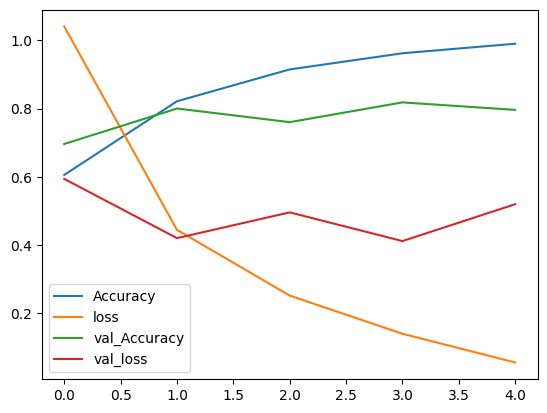

In [20]:
import pandas as pd
pd.DataFrame(history_V5.history).plot()
plt.show()

Ideally the training and valildation curves should match each other, otherwise we can understand that the model is overfitting.

### Adjusting Model Parameters

Building a machine learning model comes in 3 steps:
* Building a baseline model
* Beating the baseline with overfitting a large model
* Reducing the overfitting

Ways to Induce overfitting:
* increase the number of conv layers
* increase the number of conv filters
* Add another dense layer to the output of the flattened layer.

Ways to reduce Overfitting:

* Add data augmentatation
* Add regularization layers(such as Maxpool2D layer)
* add more data

Note:Reducing overfitting is known as **Regularization**


In [23]:
#Creating the new baseline model
Model_V6=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [25]:
Model_V6.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_V6=Model_V6.fit(X_Train,epochs=5,steps_per_epoch=len(X_Train),validation_data=X_Valid ,validation_steps=len(X_Valid))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.5348 - loss: 0.6875 - val_accuracy: 0.7660 - val_loss: 0.5312
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7617 - loss: 0.5099 - val_accuracy: 0.8260 - val_loss: 0.3957
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.8046 - loss: 0.4452 - val_accuracy: 0.8460 - val_loss: 0.3644
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8107 - loss: 0.4135 - val_accuracy: 0.8500 - val_loss: 0.3473
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.8307 - loss: 0.3881 - val_accuracy: 0.8560 - val_loss: 0.3509


In [26]:
Model_V6.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 110, 110, 10)   │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 55, 55, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 54, 54, 10)     │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 27, 27, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 7290)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         7,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,175 (98.34 KB)

 Trainable params: 8,391 (32.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,784 (65.57 KB)

### Testing with Data Augmentation

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator=ImageDataGenerator(rescale=1/255.,rotation_range=.2,zoom_range=.2,horizontal_flip=True,shear_range=.2,width_shift_range=.3,height_shift_range=.3)
train_da_generator=ImageDataGenerator(rescale=1/255.)
valid_data_generator=ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data,leading it to have more diversity and in turn allowing our model to learn more generalizable patterns

In [4]:
Augmented_Train_Data=train_data_generator.flow_from_directory("/content/pizza_steak/train",batch_size=32,target_size=(224,224),class_mode="binary",seed=42,shuffle=False)
Original_Train_Data=train_da_generator.flow_from_directory("/content/pizza_steak/train",batch_size=32,target_size=(224,224),class_mode="binary",seed=42,shuffle=False)
valid_data=valid_data_generator.flow_from_directory("/content/pizza_steak/test",batch_size=32,target_size=(224,224),class_mode="binary",seed=42,shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [5]:
Augmented_Train_Data


In [6]:
a_images,a_labels=next(Augmented_Train_Data)
o_images,o_labels=next(Original_Train_Data)


In [7]:
print(Original_Train_Data.filenames[:5])
print(Augmented_Train_Data.filenames[:5])

['pizza/1008104.jpg', 'pizza/1008144.jpg', 'pizza/1008844.jpg', 'pizza/1008941.jpg', 'pizza/1011404.jpg']
['pizza/1008104.jpg', 'pizza/1008144.jpg', 'pizza/1008844.jpg', 'pizza/1008941.jpg', 'pizza/1011404.jpg']


In [8]:
import random
def view_augmented_pictures(images,labels):
  random_index=10
  classNames=["Pizza","Steak"]

  plt.imshow(images[random_index])

  plt.axis("off")

def view_original_pictures(images,labels):
  random_index=10
  classNames=["Pizza","Steak"]

  plt.imshow(images[random_index])

  plt.axis("off")


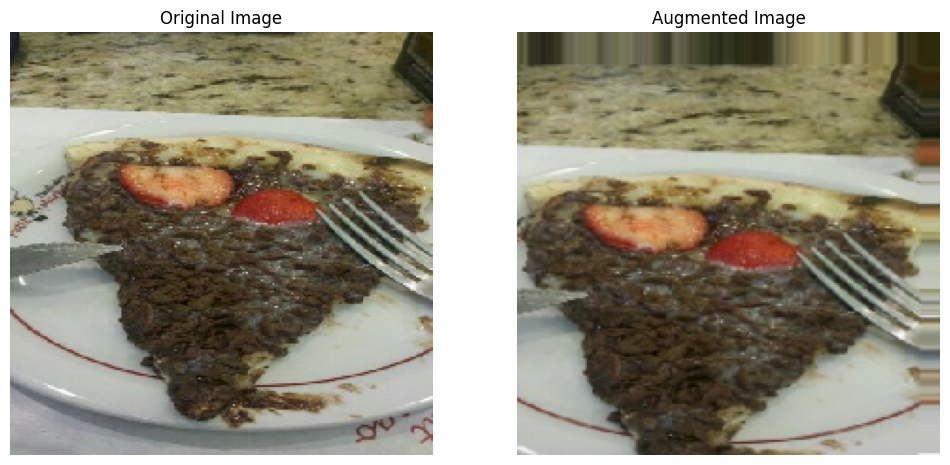

In [103]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Original Image")
view_original_pictures(o_images,o_labels)
plt.subplot(1,2,2)
plt.title("Augmented Image")
view_augmented_pictures(a_images,a_labels)

In [104]:
#Building a Model to fit our augmented data
Model_V7=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compiling our model

Model_V7.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

#Fitting our model

history_V7=Model_V7.fit(Augmented_Train_Data,steps_per_epoch=len(Augmented_Train_Data),epochs=5,validation_data=valid_data,validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 540ms/step - accuracy: 0.4577 - loss: 0.7145 - val_accuracy: 0.5360 - val_loss: 0.6924
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 461ms/step - accuracy: 0.4735 - loss: 0.6938 - val_accuracy: 0.5780 - val_loss: 0.6924
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 468ms/step - accuracy: 0.5035 - loss: 0.6930 - val_accuracy: 0.5040 - val_loss: 0.6872
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 462ms/step - accuracy: 0.4839 - loss: 0.6950 - val_accuracy: 0.5300 - val_loss: 0.6860
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 458ms/step - accuracy: 0.5550 - loss: 0.6911 - val_accuracy: 0.6420 - val_loss: 0.6849


The model_trained above was without shuffling the data

In [105]:
images,labels=next(valid_data)

In [106]:
labels.shape

(32,)

In [11]:
Shuffled_Augmented_Train_Data=train_data_generator.flow_from_directory("/content/pizza_steak/train",batch_size=32,target_size=(224,224),class_mode="binary",seed=42,shuffle=True)

Found 1500 images belonging to 2 classes.


In [12]:
#Building a Model to fit our augmented data
Model_V8=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compiling our model

Model_V8.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

#Fitting our model

history_V8=Model_V8.fit(Shuffled_Augmented_Train_Data,steps_per_epoch=len(Shuffled_Augmented_Train_Data),epochs=5,validation_data=valid_data,validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5071 - loss: 0.6818 - val_accuracy: 0.6560 - val_loss: 0.6010
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6744 - loss: 0.6104 - val_accuracy: 0.7540 - val_loss: 0.4990
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7085 - loss: 0.5587 - val_accuracy: 0.7980 - val_loss: 0.4700
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7091 - loss: 0.5614 - val_accuracy: 0.7780 - val_loss: 0.4790
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7439 - loss: 0.5452 - val_accuracy: 0.7640 - val_loss: 0.4864


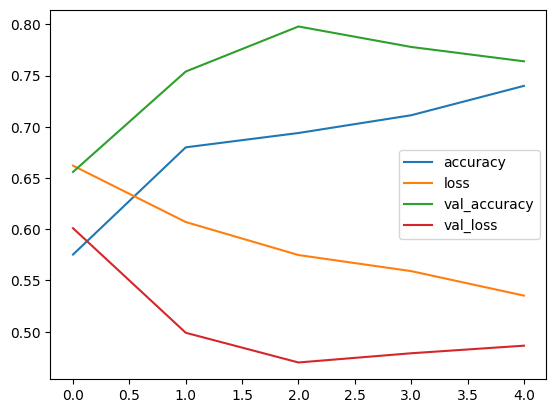

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_V8.history).plot()
plt.show()

We get much better accuracy by shuffling our data.When we don't shuffle our data,and our data is ordered in a specific order ,the model starts to learn the order of the data rather than the features of the data.

### Making a prediction with our model on a custom datset

--2025-06-15 14:07:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2025-06-15 14:07:14 (27.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



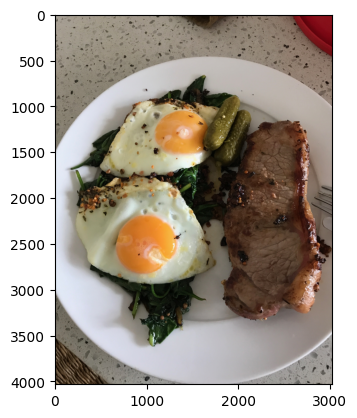

In [32]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
import matplotlib.image as mpimg
steak_image=mpimg.imread("/content/03-steak.jpeg")
plt.imshow(steak_image)
plt.show()


In [33]:
steak_image.shape

(4032, 3024, 3)

Note : When we want to create predictions on our trained model, we need to make sure the the custom data is the same format as our traininng data

In [34]:
#function to load and format images
def format_images(filename,image_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[image_shape,image_shape])
  img=img/255
  return img

In [48]:
formatted_image=format_images("03-steak.jpeg")

In [49]:
formatted_image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [50]:

formatted_image.shape

TensorShape([224, 224, 3])

In [52]:
Model_V8.predict(tf.expand_dims(formatted_image,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


array([[0.8340597]], dtype=float32)

### Visualizing our prediction

In [64]:
def predict_plot(filename):
  formatted_image=format_images(filename)
  formatted_image=tf.expand_dims(formatted_image,axis=0)
  ypred=tf.round(Model_V8.predict(formatted_image))
  classes=["pizza","steak"]
  pred_index=int(tf.cast(ypred[0][0],dtype=tf.int32).numpy())

  plot_image=mpimg.imread(filename)
  plt.imshow(plot_image)
  plt.axis("off")
  plt.title(f"The Predicted Class is {classes[pred_index]}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


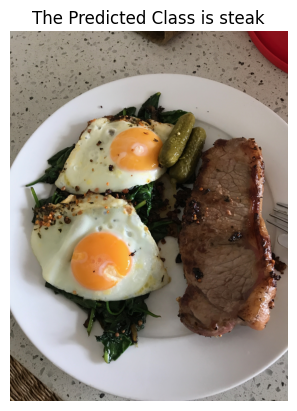

In [65]:
predict_plot("03-steak.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


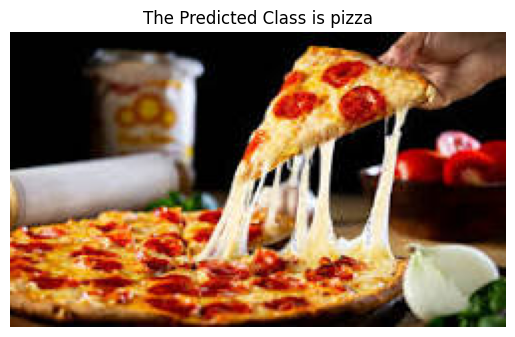

In [66]:
predict_plot("download.jpg")